In [1]:
import matplotlib.pyplot as plt
from pylab import imshow, figure, plot, colorbar, show, hist
%matplotlib inline

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import numpy as np
from keras.models import Model
from keras.optimizers import SGD, Adam, Nadam, RMSprop

import data
import datagen
import net

import random
import skimage.transform
import json
import pickle
import sklearn.metrics

import sys
import importlib
import datetime
import subprocess

SNAP_PATH = '/mnt/data/snap/'
localizer_output_dir = '/mnt/data/snap/localizer_output_k1_a/'
min_activity = 60



Using TensorFlow backend.
/home/alex/anaconda3/lib/python3.6/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [3]:
df = data.ndsb17_get_df_test_labels()

In [5]:
patient_ids = list(df["id"])

id = 026470d51482c93efc18b9803159c960  label = 1.0
  activation = 3.62344


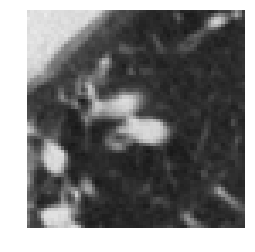

  activation = 4.01802


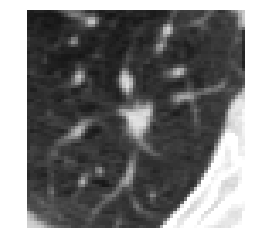

id = 031b7ec4fe96a3b035a8196264a8c8c3  label = 1.0
  activation = 3.97186


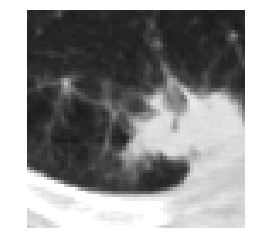

id = 03bd22ed5858039af223c04993e9eb22  label = 0.0
id = 06a90409e4fcea3e634748b967993531  label = 0.0
  activation = 4.24598


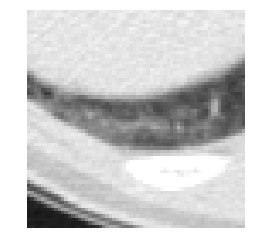

  activation = 4.15496


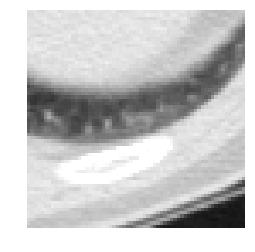

  activation = 3.48847


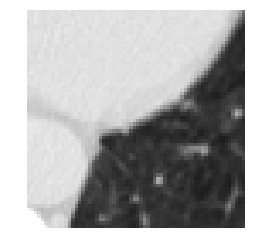

id = 07b1defcfae5873ee1f03c90255eb170  label = 1.0
id = 0b20184e0cd497028bdd155d9fb42dc9  label = 0.0
id = 12db1ea8336eafaf7f9e3eda2b4e4fef  label = 0.0
id = 159bc8821a2dc39a1e770cb3559e098d  label = 0.0
  activation = 3.78596
id = 174c5f7c33ca31443208ef873b9477e5  label = 0.0
  activation = 4.21172


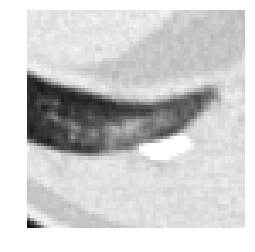

  activation = 3.17359


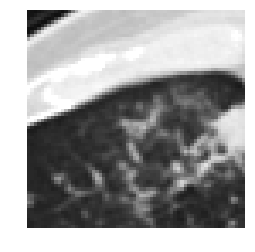

id = 1753250dab5fc81bab8280df13309733  label = 0.0
id = 1cf8e778167d20bf769669b4be96592b  label = 0.0
id = 1e62be2c3b6430b78ce31a8f023531ac  label = 1.0
  activation = 5.35102


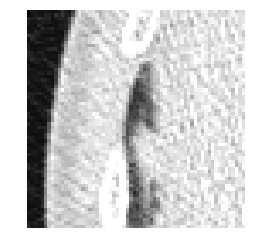

  activation = 4.24729


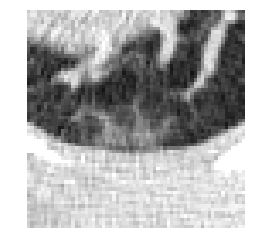

id = 1f6333bc3599f683403d6f0884aefe00  label = 0.0
  activation = 4.09016


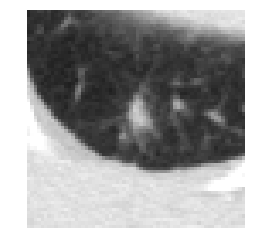

id = 1fdbc07019192de4a114e090389c8330  label = 1.0
  activation = 5.05044
  activation = 5.27164


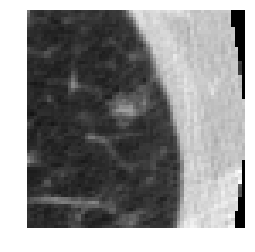

  activation = 4.2277


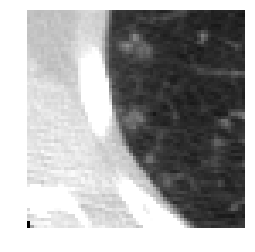

  activation = 3.4667


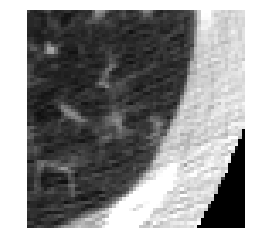

  activation = 4.18173


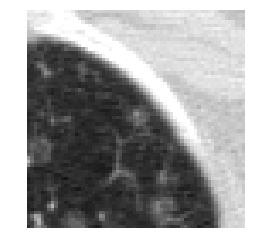

  activation = 5.17277


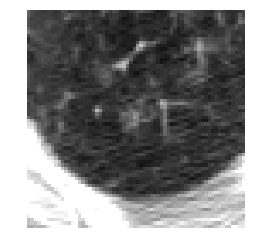

  activation = 4.54318


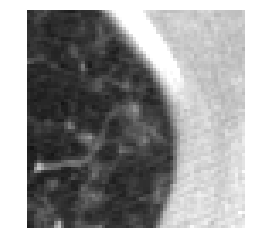

  activation = 4.14983


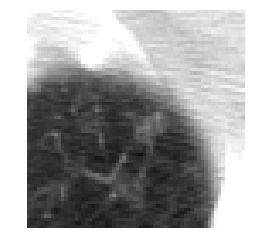

  activation = 4.1342


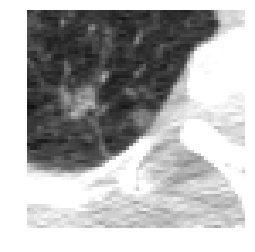

  activation = 4.41762
id = 2004b3f761c3f5dffb02204f1247b211  label = 0.0
id = 202898fa97c5949fbdc07ae7ff1cd9f0  label = 0.0
  activation = 3.55441


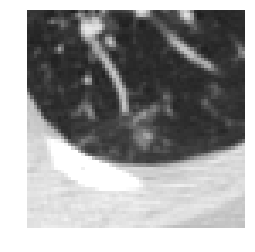

id = 21b73c938fd7d346ee77a60bd60aaeac  label = 0.0
  activation = 3.97697
id = 243038f7bb7787497c59bc17f04c6ed9  label = 0.0
  activation = 4.05793


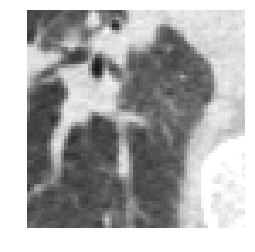

  activation = 3.73046


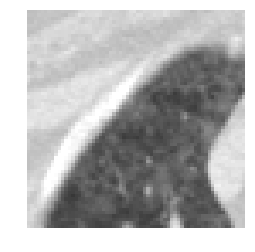

id = 26142353f46d20c9fdded93f01e2bff4  label = 0.0
  activation = 3.88785


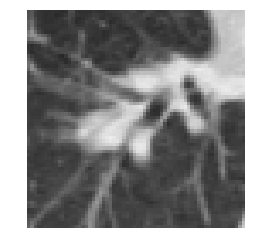

  activation = 3.97992


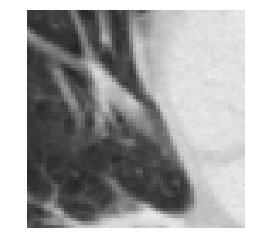

  activation = 4.56494


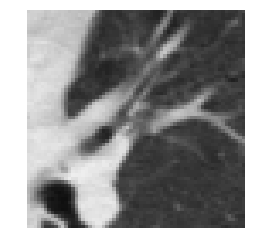

id = 263a1c3bfa43556623e75ed901e3fd8f  label = 1.0
  activation = 3.93918


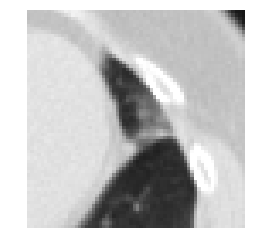

  activation = 3.69098


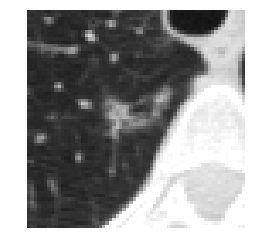

id = 2703df8c469906a06a45c0d7ff501199  label = 1.0
  activation = 4.87135


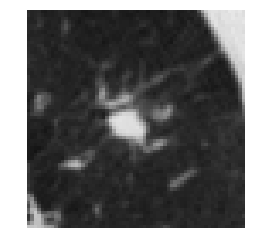

id = 2a3e6ecf9499607ef4fd14b436136b0c  label = 0.0
  activation = 4.61592


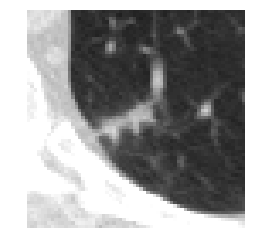

  activation = 5.33177


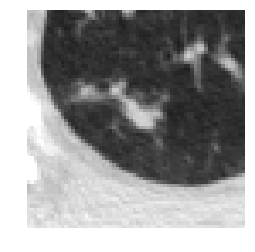

  activation = 5.10049


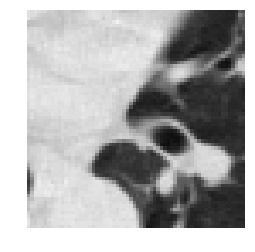

id = 2d596b6ead89ab35577fe625a9a17cbb  label = 1.0
  activation = 4.90325


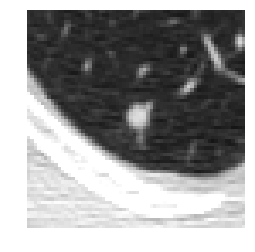

id = 2eb92d17ca91b393765e8acf069763a6  label = 1.0
  activation = 4.33029


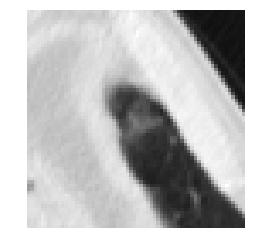

  activation = 5.28725


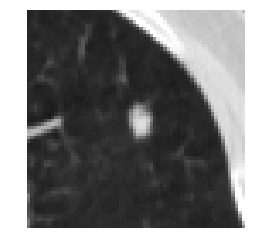

id = 2f77fd993fbd858dec3c085b9ff1a3a2  label = 1.0
  activation = 6.22864


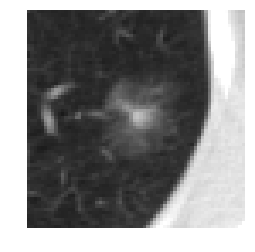

id = 3295cec04482210dc6f78c2b4a1d287b  label = 0.0
  activation = 4.54404


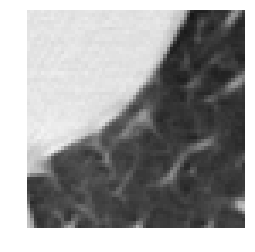

  activation = 4.0128


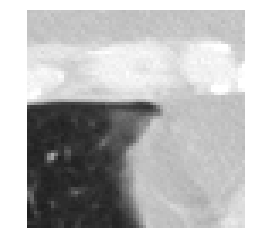

  activation = 3.57869


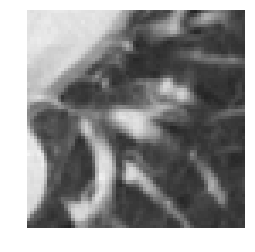

id = 33387bea2cacf6127035cc7033036a02  label = 0.0
id = 34037914ceeec5605fc890159dd425c5  label = 1.0
  activation = 5.84515


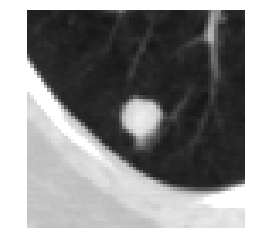

id = 38bf066bba822584e14c0af65d4bb5e9  label = 0.0
  activation = 3.79555
  activation = 5.35773
  activation = 4.15896


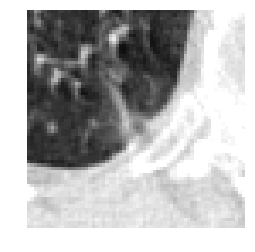

  activation = 3.02639


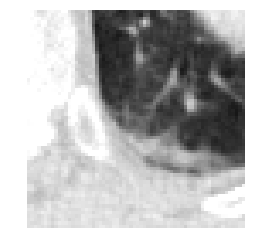

  activation = 3.55115


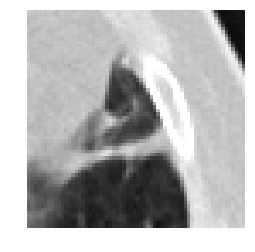

id = 3ee1fd6a0f3f108c3558e6699fb011f2  label = 0.0
id = 42b2161e43b4dd0ea94604485976c59c  label = 0.0
id = 4434e19303b62ebaecef2596583ff351  label = 0.0
  activation = 3.72318
  activation = 2.96786


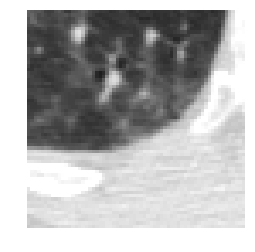

  activation = 3.75788


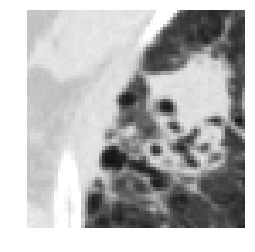

  activation = 3.96353


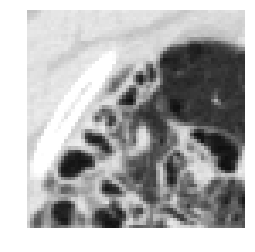

  activation = 4.40831


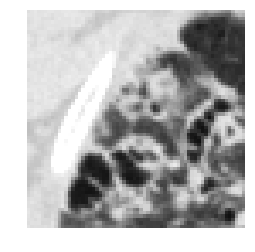

id = 4575fe61bf3f536ce6cfeb26fcc2893c  label = 1.0
  activation = 5.46483


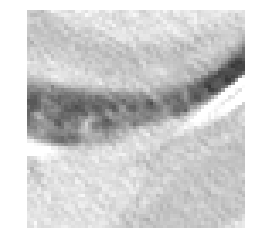

  activation = 5.46321


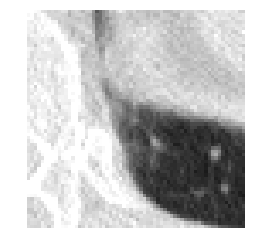

id = 48ab0b98fc7789304c21430978624f32  label = 0.0
id = 49433c1588cc078b825a0eff1dc2e816  label = 0.0
  activation = 4.97283


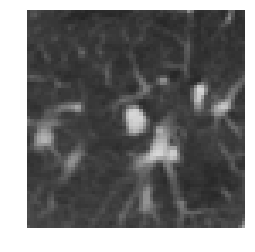

  activation = 4.31008


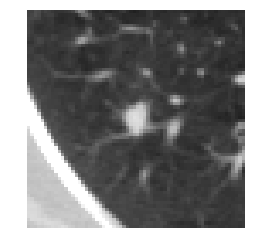

  activation = 3.72496


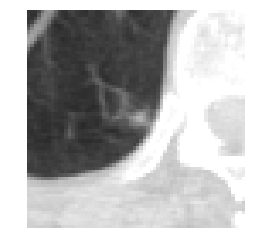

id = 49c88f7cc77341c9ae4e64243f9912fc  label = 0.0
  activation = 5.24165


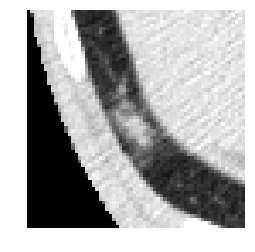

id = 4b28f147cb82baba3edcdbd34ca19085  label = 0.0
id = 505405b3e70fb24b92e6a8a5b7ed339c  label = 0.0
id = 50cdacec399071cf70d8badd2511d0b3  label = 0.0
id = 519ad4ead3e61d2d71088ac8e46f25b6  label = 0.0
id = 52f6d741e674f62fbcf73e6ec4f6a472  label = 0.0
  activation = 3.36141


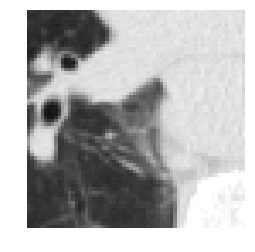

id = 538543b57d0c8fa0b2b6bb7c84df3f33  label = 0.0
id = 5451203688c930484ba1f3c7f1378847  label = 0.0
id = 55b06d60e7c0329787f81d1b7cbf9aa0  label = 0.0
  activation = 6.34654


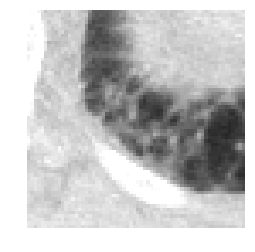

  activation = 3.51367


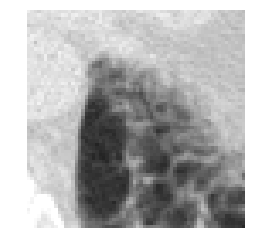

  activation = 4.06421


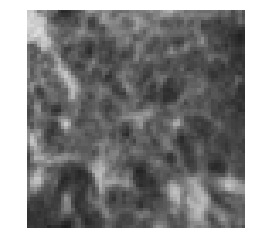

  activation = 6.62363


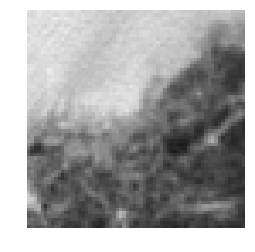

  activation = 4.25414


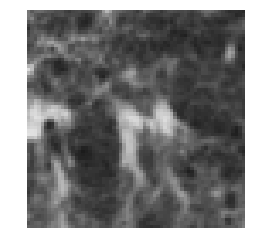

  activation = 4.51016


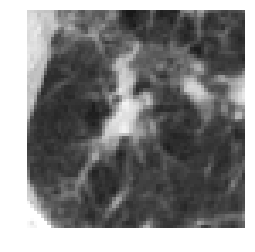

  activation = 4.3758


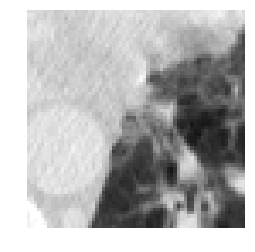

  activation = 4.69762
  activation = 4.07132
  activation = 4.23251


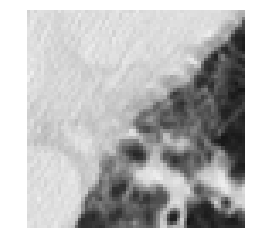

  activation = 4.82263


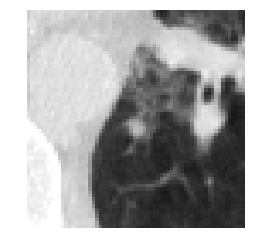

  activation = 3.55066


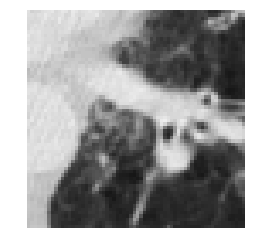

id = 567547810a1795b9c8e11c15dfd32c34  label = 1.0
  activation = 5.41181


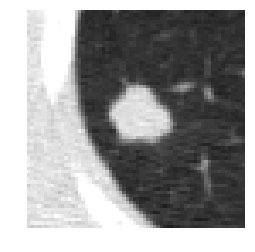

id = 5791c42d317f34592be9a933c50e68ad  label = 0.0
id = 580cffecce8d3d53cde1abb922adf21a  label = 0.0
  activation = 3.51332


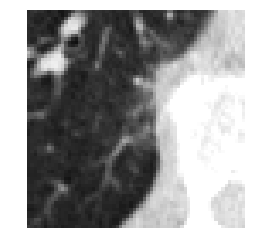

id = 59af702c21840ec18073b6b56c95e7fe  label = 1.0
  activation = 4.35576


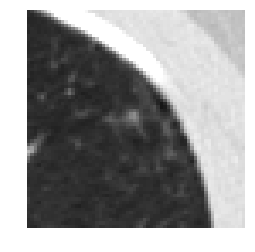

  activation = 5.03763


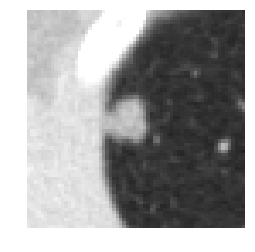

id = 5a42f0a0d1e060531c20d04ed23efc02  label = 0.0
  activation = 4.55404


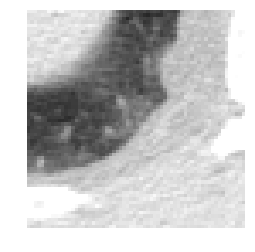

  activation = 3.89555


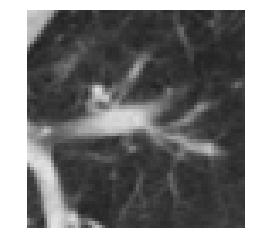

  activation = 4.36524


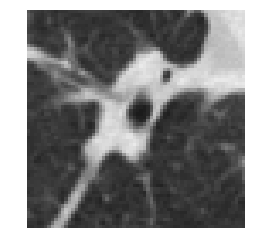

id = 5ae9ab473d59cd29262c47a741177b6e  label = 0.0
id = 5ce91933688cc8400105bf640ac11535  label = 0.0
  activation = 5.27199
id = 5d16819bd78c74448ce852a93bf423ad  label = 1.0
  activation = 3.49785


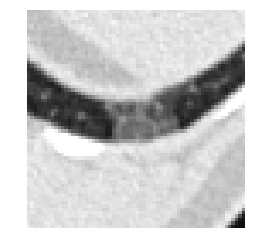

  activation = 4.36884


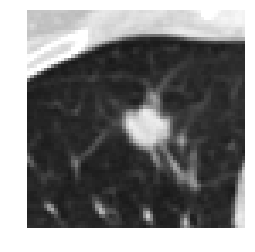

id = 61017c23bbae6e17062ff582d1a237b3  label = 0.0
  activation = 3.98133


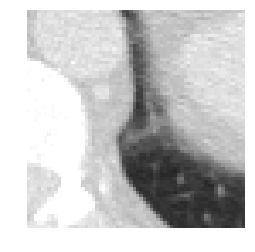

  activation = 4.48383


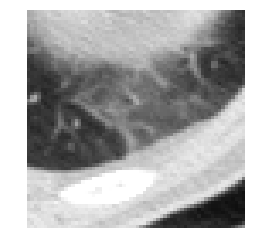

  activation = 3.6078


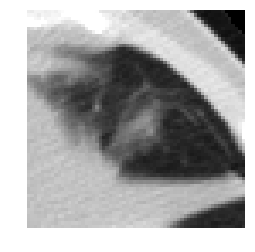

  activation = 4.99281


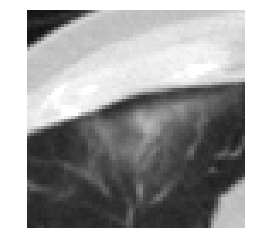

id = 616f98dab4db03edbad28c73d22468d2  label = 0.0
id = 63458b5875a0b223ec21555d17b52fd4  label = 0.0
  activation = 3.22262


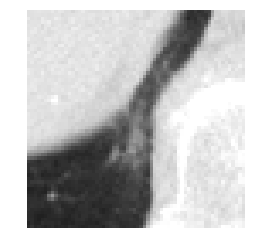

  activation = 4.9181


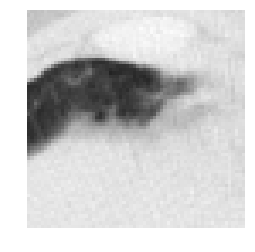

  activation = 4.39544


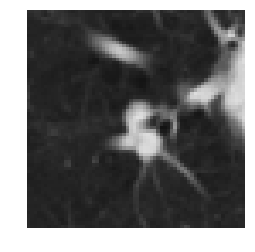

  activation = 5.88638


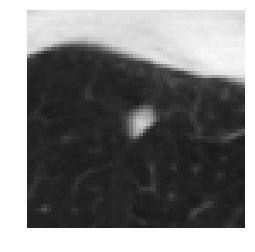

id = 6379e4435f78a5e5c150c32146ece4d4  label = 0.0
  activation = 4.60895


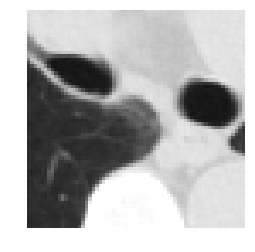

id = 649fd56ef9809019b57261fcf9574d76  label = 0.0
  activation = 5.9726


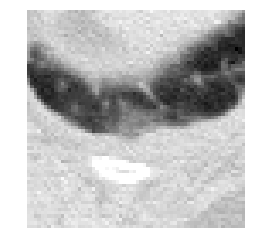

id = 665c1913d8e90e57af3b745349d19537  label = 1.0
id = 68f4dff6dd1f135488e83b8a4ee6e20e  label = 0.0
  activation = 5.71409


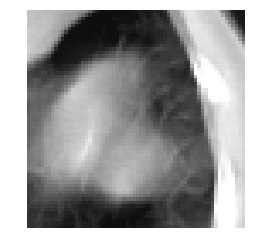

  activation = 4.01029


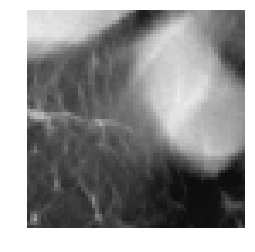

  activation = 5.93593


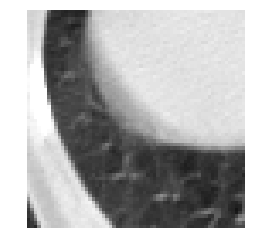

id = 6993396b31078993e13cf9c0a6fd470b  label = 0.0
  activation = 4.02782


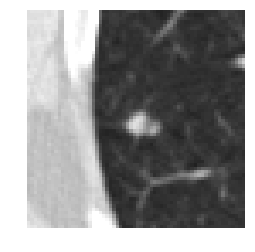

id = 6c71617e2cee498fd3dd20956bb90a3b  label = 0.0
id = 6d3b16f2e60c3a1a4246f340dba73676  label = 0.0
id = 6d3be6081d76d2365b080e599628d3bc  label = 0.0
id = 6d43fdb6eb1bec3a5f4febfd442e8c93  label = 0.0
  activation = 4.19025


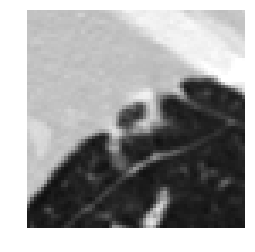

id = 6e240f23afa2c1b4352cd0db5d4f357d  label = 1.0
id = 6f229187fe608c9eacc567eb74c1458c  label = 1.0
  activation = 4.92137


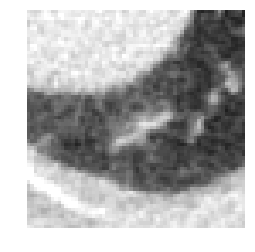

  activation = 4.07844


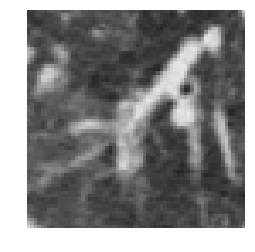

  activation = 5.71441


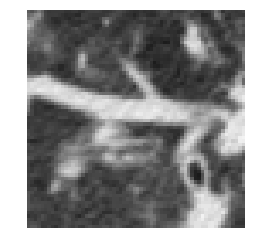

  activation = 3.63932


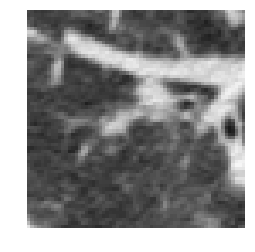

  activation = 4.62608


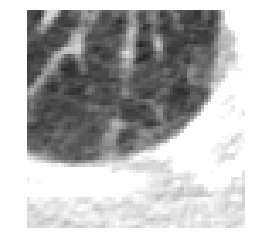

  activation = 6.04846


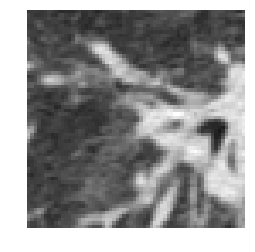

  activation = 5.13385


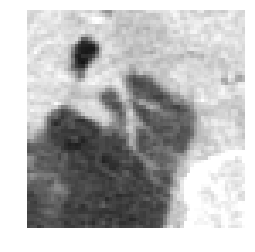

  activation = 4.91018


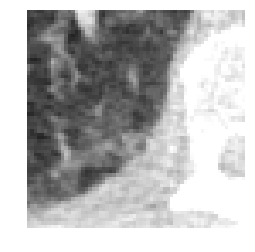

  activation = 3.53231


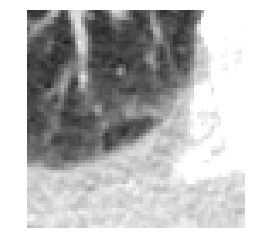

id = 7027c0b8c8f8dcc76c6e4ba923d60a2e  label = 0.0
id = 70671fa94231eb377e8ac7cba4650dfb  label = 0.0
  activation = 3.9055


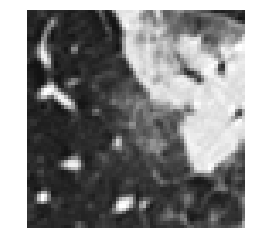

id = 70f4eb8201e3155cc3e399f0ff09c5ef  label = 1.0
id = 7191c236cfcfc68cd21143e3a0faac51  label = 0.0
  activation = 6.31882


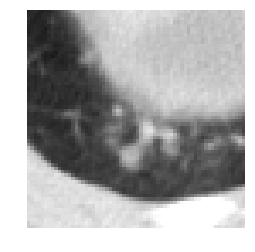

  activation = 3.94483


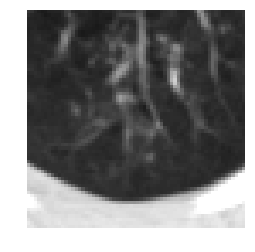

id = 763288341ee363a264fe45a28ea28c21  label = 0.0
  activation = 4.65274


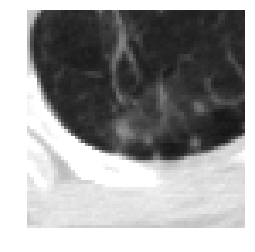

  activation = 4.47522


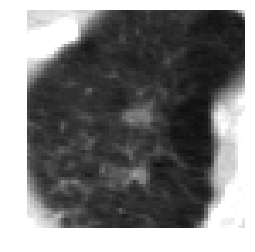

id = 7869cc6bfc3678fec1a81e93b34648cf  label = 0.0
id = 7c2fd0d32df5a2780b4b10fdf2f2cdbe  label = 0.0
  activation = 4.4461


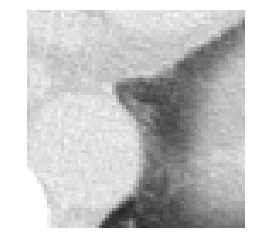

  activation = 3.36801


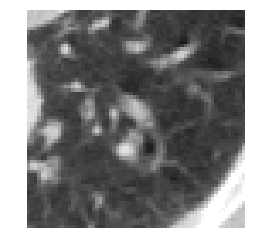

  activation = 4.11765


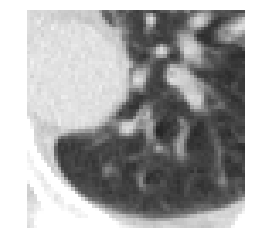

  activation = 4.52358


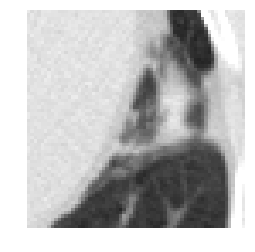

  activation = 3.63145


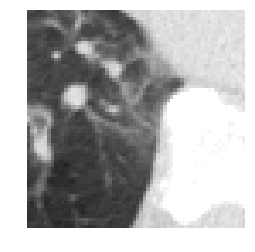

  activation = 3.55084


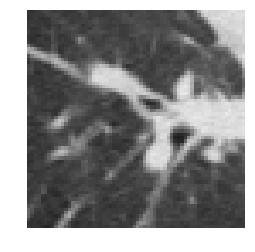

  activation = 4.5732


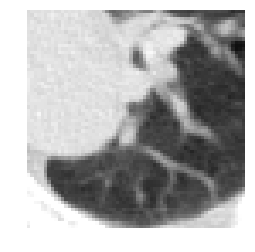

  activation = 4.21149


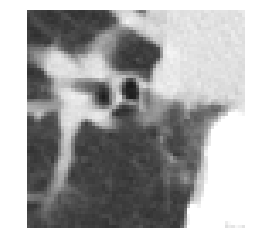

  activation = 4.42989


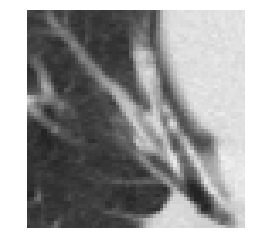

  activation = 5.33961


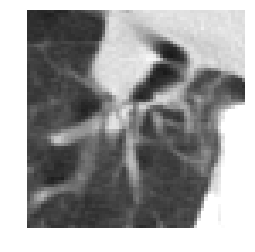

  activation = 6.1126


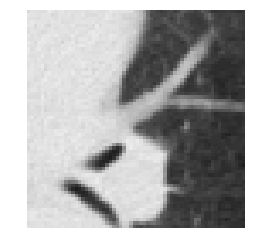

  activation = 4.86575


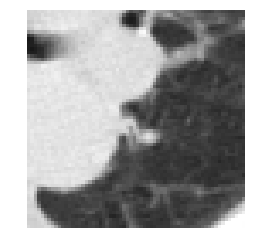

  activation = 4.24994


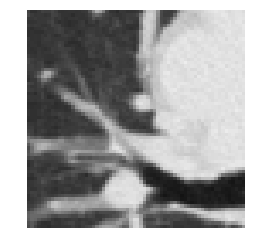

id = 7ce310b8431ace09a91ededcc03f7361  label = 0.0
  activation = 4.66925


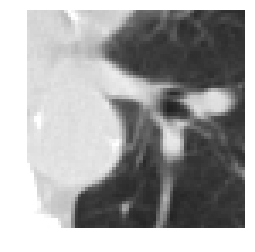

  activation = 4.42162


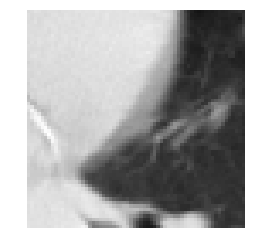

  activation = 3.72721


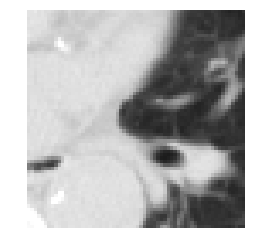

  activation = 3.74299


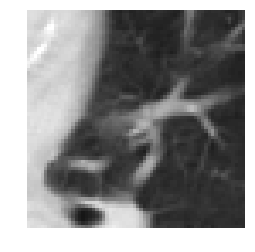

  activation = 5.35681


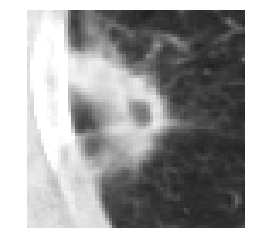

  activation = 5.30644


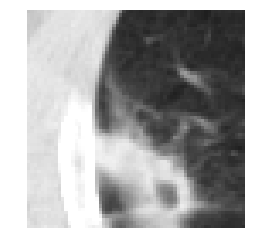

id = 7cf1a65bb0f89323668034244a59e725  label = 1.0
  activation = 7.48763


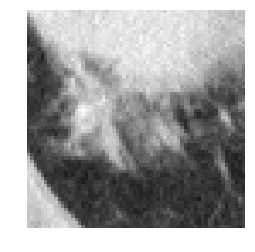

  activation = 4.99965


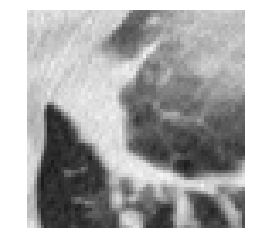

  activation = 3.80265


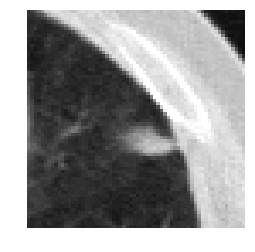

  activation = 4.17666


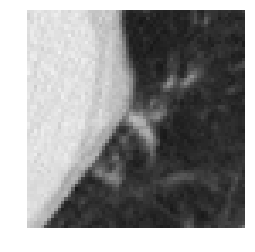

id = 7daeb8ef7307849c715f7f6f3e2dd88e  label = 0.0
  activation = 4.34223


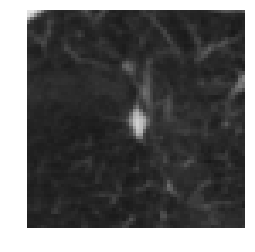

id = 7f096cdfbc2fe03ec7f779278416a78c  label = 0.0
  activation = 5.06936


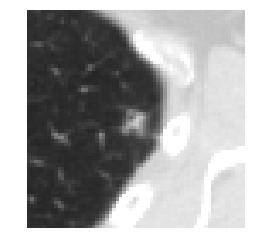

id = 7fd5be8ec9c236c314f801384bd89c0c  label = 1.0
  activation = 5.13857


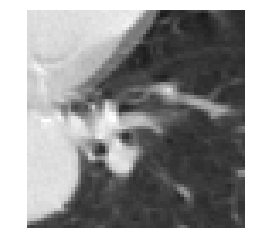

  activation = 6.18491


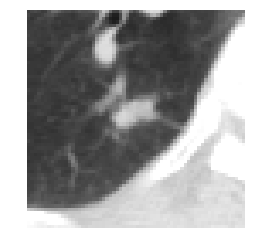

  activation = 4.6452


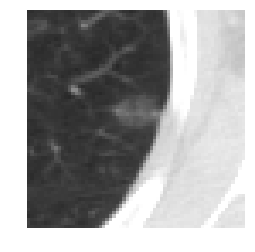

id = 80938b4f531fa2334c13d829339e1356  label = 0.0
id = 80bda1afde73204abd74d1ebd2758382  label = 0.0
  activation = 3.9159


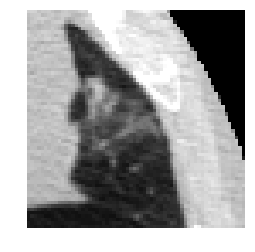

id = 81bd0c062bfa8e85616878bab90f2314  label = 0.0
id = 82b9fb9e238397b2f3bff98975577ff9  label = 0.0
  activation = 6.44896


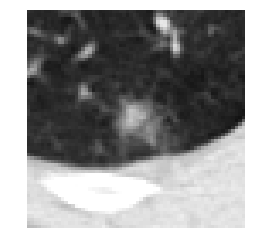

id = 83728b6eed98845556bfc870b7567883  label = 0.0
  activation = 3.35688
id = 84ed26b5d79da321711ed869b3cad2ea  label = 1.0
  activation = 4.32954


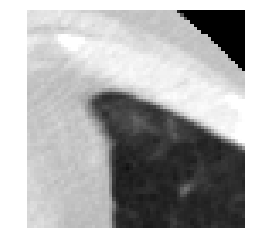

  activation = 6.19484


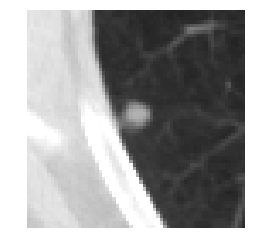

  activation = 3.29368


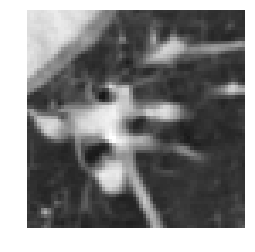

  activation = 5.66539


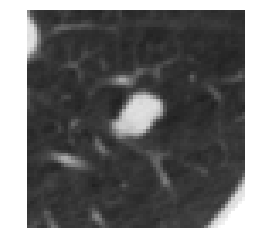

id = 85ab88f093ca53a4fab5654e24c77ebe  label = 0.0
id = 85d6fb4a08853d370935a75de7495a27  label = 0.0
id = 86ad341b9ac27364f03981f6a775246c  label = 0.0
  activation = 5.04401


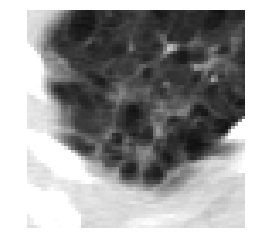

id = 88acee40bb9d8cb06898d1c5de01d3c8  label = 1.0
  activation = 5.0821


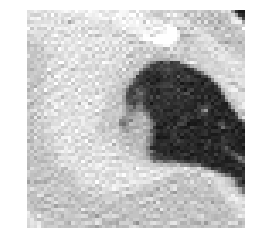

  activation = 4.4592


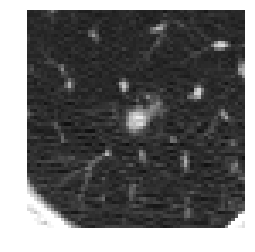

id = 89f003dbfbdbd18a5cdeb9b128cb075b  label = 0.0
  activation = 5.19101


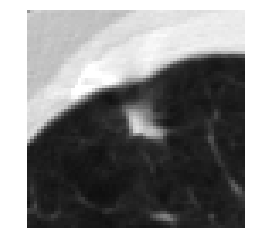

id = 8a1e5830a16db34b580202f8b6dbbd3d  label = 0.0
id = 8b494d14d835dd5ae13dab19b9520a55  label = 0.0
  activation = 5.65721


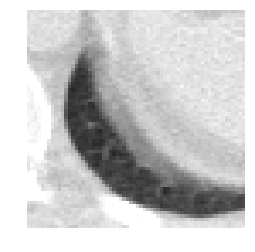

  activation = 4.38281


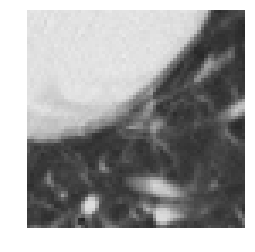

  activation = 5.18045


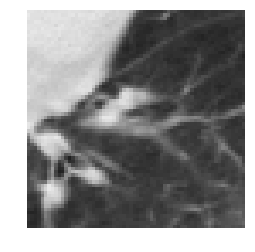

  activation = 4.26843


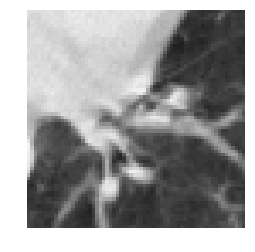

  activation = 4.51762


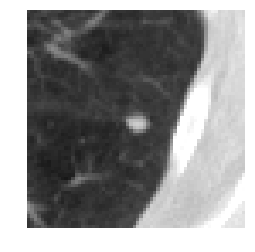

id = 8b9a28375988de6ea0b143d48b4a8dc9  label = 0.0
id = 8bb7dd5fbfa5ecb95552d9c587f2fea5  label = 1.0
  activation = 4.76443


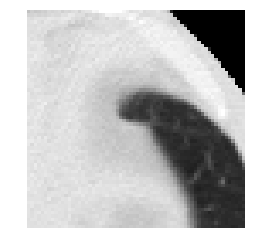

  activation = 4.46575


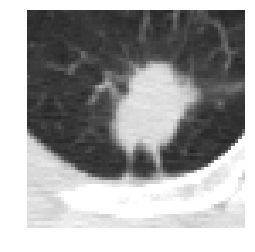

  activation = 5.67983


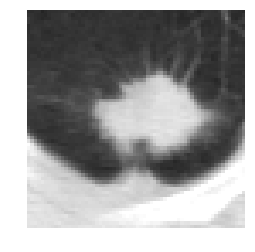

id = 8be7a7cc747365030bee8297221ab5bc  label = 0.0
  activation = 5.17718


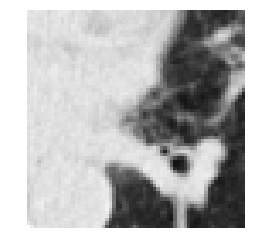

id = 8e60f166f1f1dc0d72f997fe1c9e72b4  label = 0.0
id = 8e9002a485cbda2b47cd14014d6f1c36  label = 0.0
id = 8f517521a2ed576e853fab1907fa5ffd  label = 1.0
  activation = 4.52334


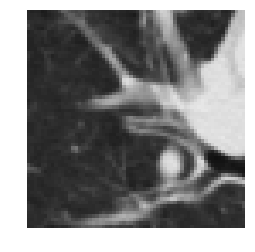

  activation = 4.49016


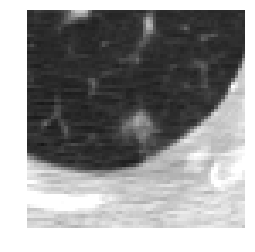

id = 8fde44df03fb80366c6604db53d3623f  label = 0.0
  activation = 5.96207


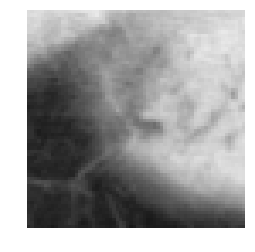

  activation = 5.22016


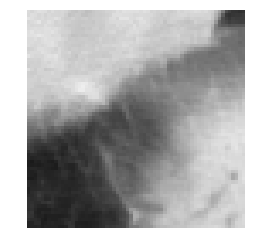

id = 901ed0a38aa16933c04ffd531b0aa2cf  label = 1.0
  activation = 3.90295


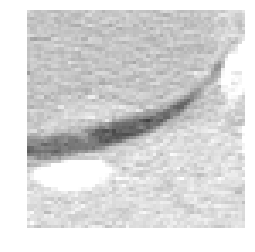

  activation = 4.38413


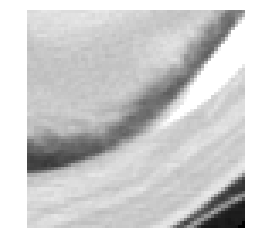

  activation = 5.49515


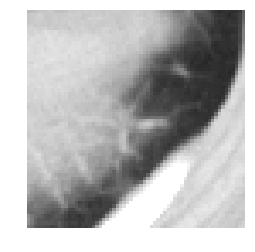

id = 9050cf3aa8371bd7088c4bdf967141d4  label = 1.0
  activation = 5.03677


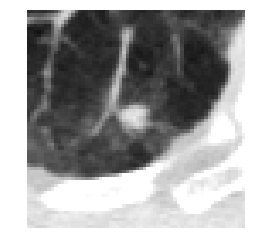

  activation = 3.67601


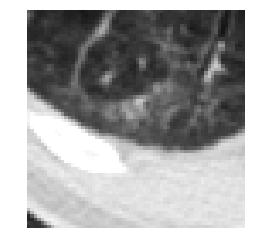

id = 9065f2b133129c5747d42db18a424749  label = 1.0
  activation = 4.40023


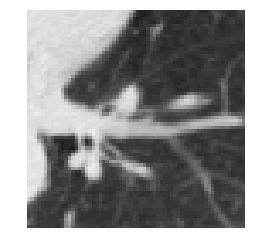

  activation = 5.00627


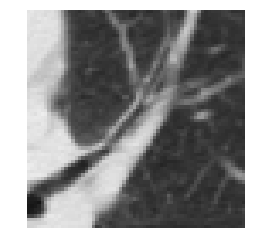

  activation = 3.91604


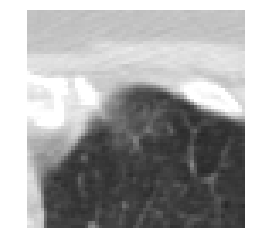

id = 931253c408c440a8494dfaa74251efd3  label = 0.0
id = 94df6d1ae21c5bfaebe6f8daf8fcd85b  label = 0.0
id = 95a98df466d4f6c6689908ea9a8f324b  label = 0.0
  activation = 3.53363


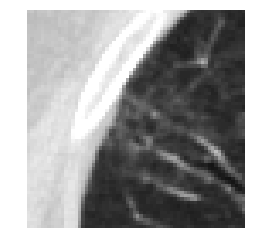

  activation = 3.6683


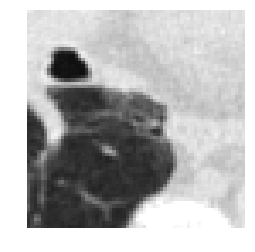

  activation = 3.32959


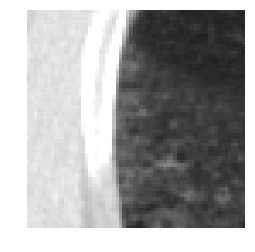

  activation = 4.20849


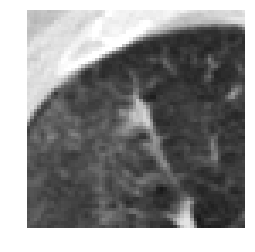

  activation = 4.63047


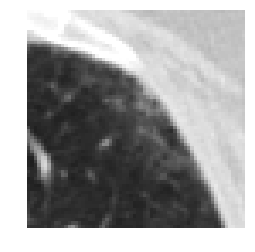

  activation = 4.07979


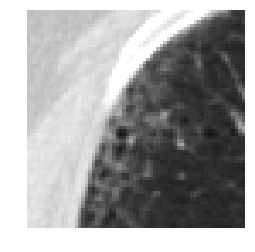

id = 96042e205dd3dc055f084aaca245e550  label = 0.0
  activation = 6.33217


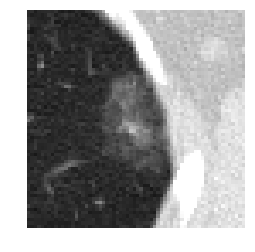

id = 96544665531e7f59bc2730e3c5f42e65  label = 1.0
id = 96cca9d8e5764daa4bcb6c0ba07735bc  label = 0.0
id = 993f1e68290d591f755669e97b49b4f4  label = 0.0
id = 995fc0581ed0e3ba0f97dbd7fe63db59  label = 0.0
id = 9a378249b799bbcefac2a7de46896c0a  label = 1.0
  activation = 5.95647


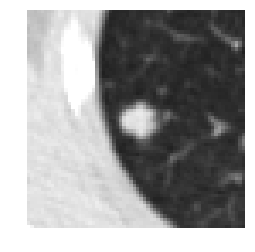

id = 9b871732b3935661e7639e84a6ab9747  label = 1.0
  activation = 4.0417


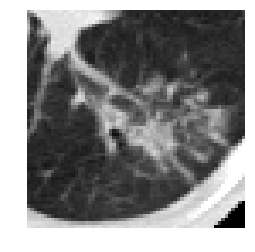

  activation = 4.09108


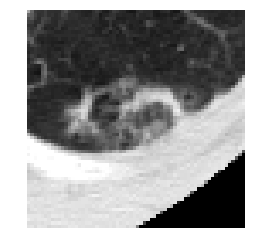

id = 9ca18e68b6b8d9c3112b4b69b7d6fad5  label = 0.0
  activation = 3.3674


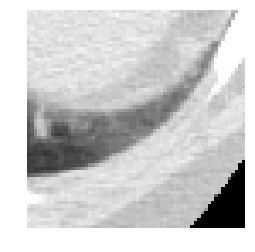

  activation = 4.09156


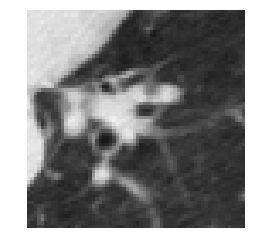

id = 9cc74e673ec9807ee055973e1b185624  label = 0.0
id = 9de48cf43611478ffc1fef051b75dc8c  label = 0.0
  activation = 5.64199


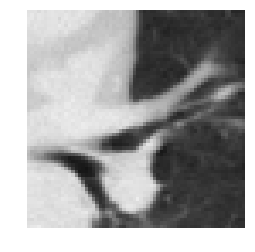

id = a0e60d7a13f6bb4002cc4a08e60b0776  label = 1.0
  activation = 6.49035


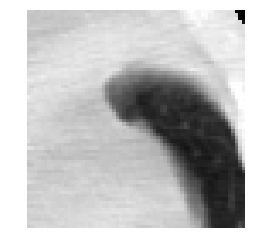

id = a0fc609febe3eef5a4713a22996cf8e5  label = 0.0
  activation = 4.30164


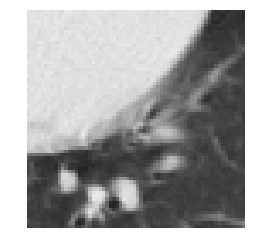

id = a2558184e0f4a68e9fb13579d20cb244  label = 1.0
  activation = 4.54654


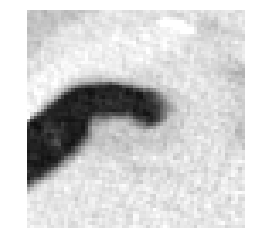

  activation = 3.03081


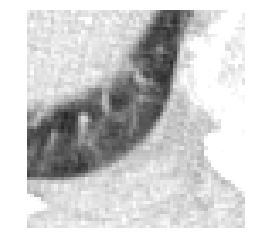

id = a2a4bc7708f6831470d757cd6f32bffe  label = 1.0
  activation = 4.88545


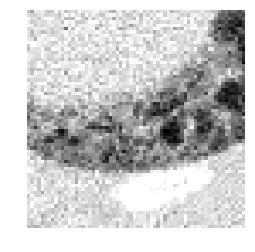

  activation = 4.80181


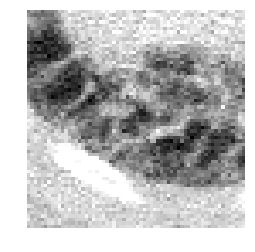

  activation = 4.51174


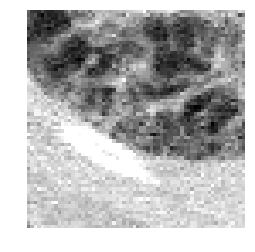

  activation = 4.42819


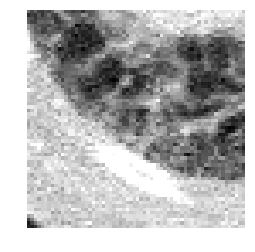

  activation = 4.33882


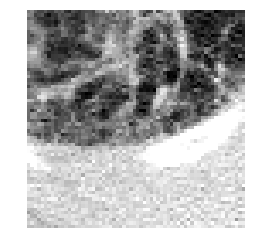

  activation = 4.33994


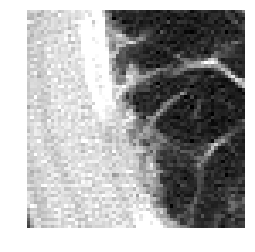

  activation = 4.14144


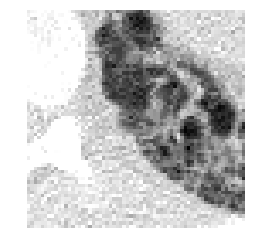

id = a334d15ac8d2d25bce76693b1b2a3ed7  label = 0.0
id = a5bb766ab3b1bc5a8023a50a956595f2  label = 1.0
  activation = 5.54547


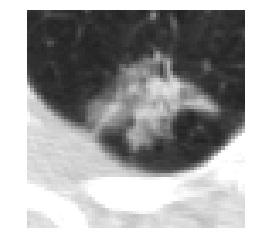

  activation = 4.89819


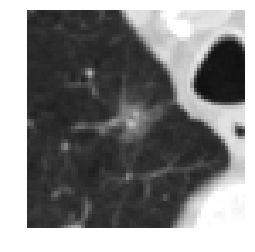

id = a5d7909f14d43f01f44cdcaabed27b84  label = 0.0
  activation = 4.40584


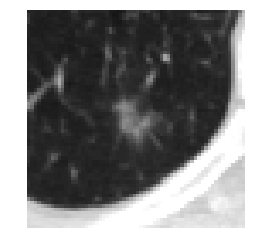

id = a6c15206edadab0270898f03e770d730  label = 0.0
  activation = 3.68867


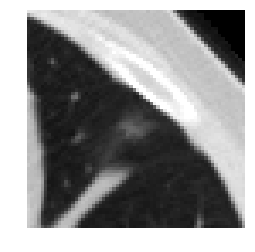

  activation = 4.78407


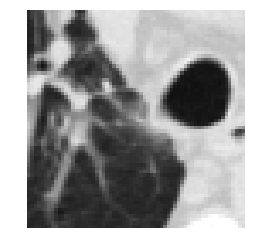

id = aa59b7a4aa4dfb2489feea527eda3e4d  label = 1.0
  activation = 4.09209


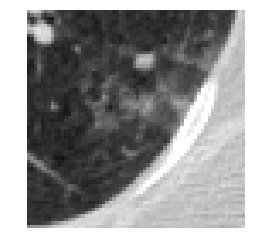

id = ab9c7bef62d1ad65b824414087b6f06b  label = 0.0
  activation = 3.64956


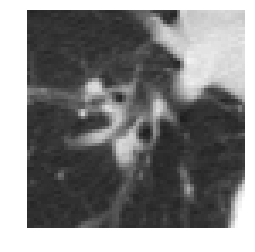

id = ac4056071f3cc98489b9db3aebfe2b6a  label = 1.0
  activation = 4.98781


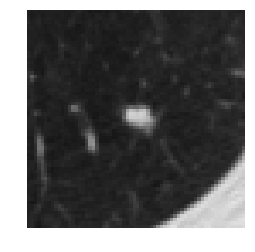

id = ae2fdcd8daa3fede6ae23cc63a8d9a82  label = 0.0
id = ae4e9d8aab8f8f5ae975bcca923f468d  label = 0.0
  activation = 4.51001


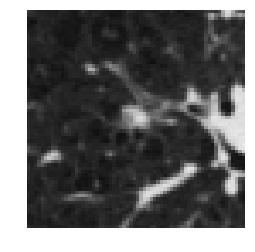

id = ae61ec94b0b8de5439180f4776551e42  label = 0.0
id = aec5a58fea38b77b964007aa6975c049  label = 0.0
id = af1d0c2fcde369dd1b715460c2f704a2  label = 1.0
  activation = 5.1683


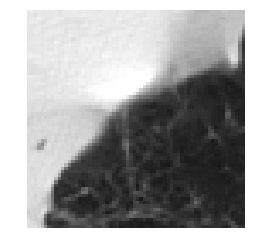

  activation = 4.20099


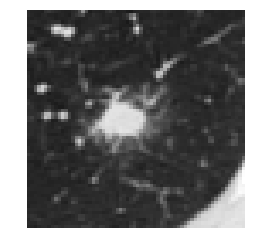

  activation = 4.49039


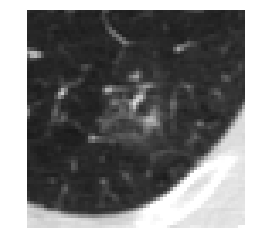

id = b0599ad2f33276e7cd065eaa8dcec8a2  label = 0.0
id = b17c07114dcf49ce71c8da4b43cf1192  label = 1.0
  activation = 4.71379


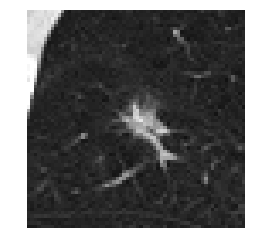

id = b4d5b618fdf3a5a1bcfb325a3715e99e  label = 0.0
  activation = 7.39697


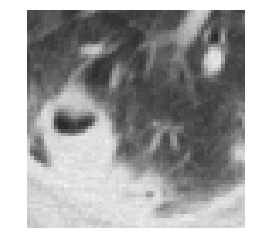

  activation = 5.67386


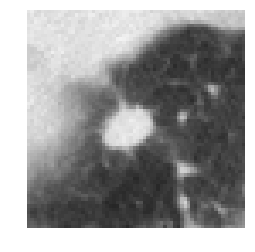

  activation = 3.15118


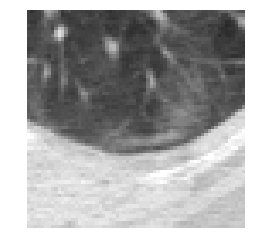

  activation = 8.89138


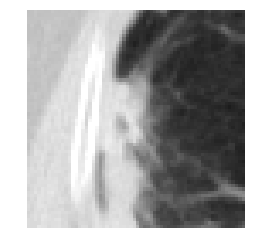

  activation = 4.98077


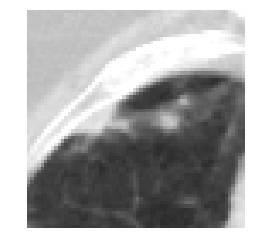

  activation = 2.85854


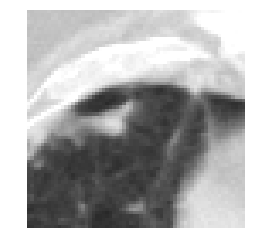

  activation = 4.24209


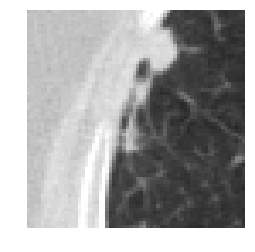

  activation = 4.25323


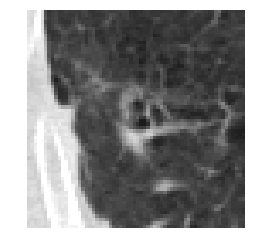

  activation = 3.62681


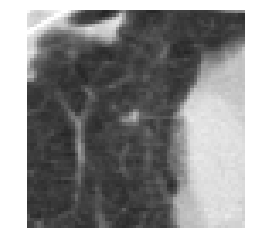

  activation = 4.07704


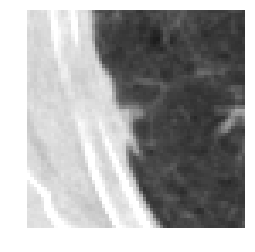

  activation = 4.10061


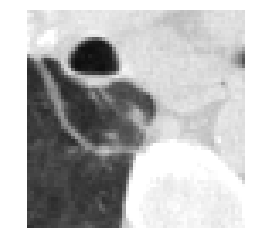

  activation = 3.93829


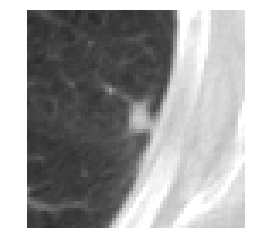

  activation = 4.43359


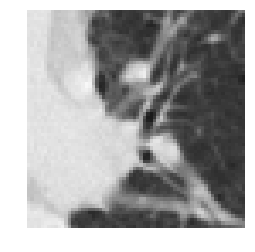

  activation = 3.52203


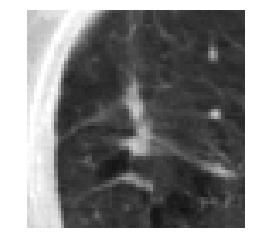

id = b4db5b96c65a668a2e63f9a3ed36afe7  label = 1.0
  activation = 5.22645


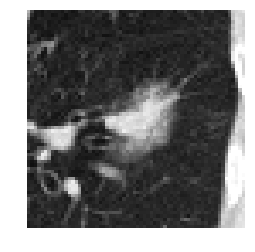

id = b53d997901eb880c41fbfbc82847204c  label = 0.0
id = b6857d98b7b3dbe84f153617f4dfd14b  label = 0.0
  activation = 4.18583


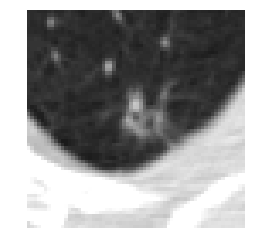

  activation = 6.33935


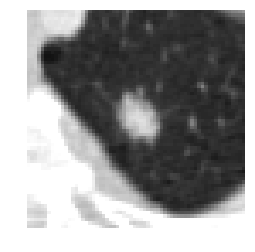

id = b82efe72526c59a96257208d95e54baf  label = 1.0
  activation = 4.40912


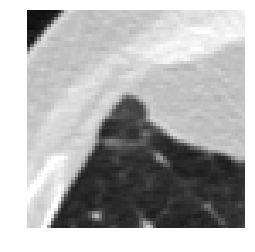

  activation = 5.57337


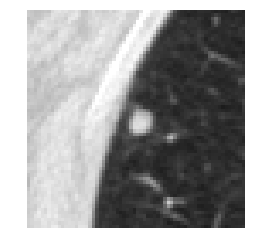

id = b8793dbd40de88c0de0913abbaab0fe7  label = 0.0
  activation = 3.65622
id = bbf7a3e138f9353414f2d51f0c363561  label = 0.0
id = bdc2daa372a36f6f7c72abdc0b5639d1  label = 0.0
  activation = 5.02731


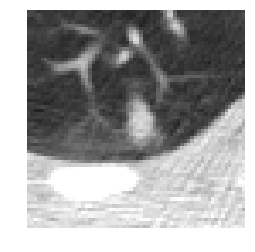

id = bdfb2c23a8c1dca5ea8c1cc3d89efee9  label = 1.0
  activation = 3.44894


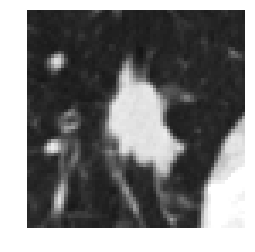

id = be3e35bf8395366d235b8bcfc71a05ee  label = 0.0
  activation = 4.17716


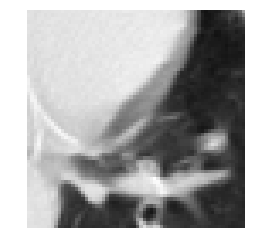

  activation = 4.27963


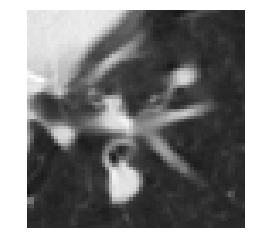

id = be9a2df5a16434e581c6a0625c290591  label = 0.0
id = bf6a7a9ab4e18b18f43129c9e22fb448  label = 0.0
  activation = 4.7112


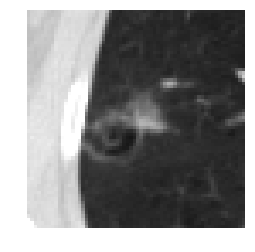

  activation = 5.02289


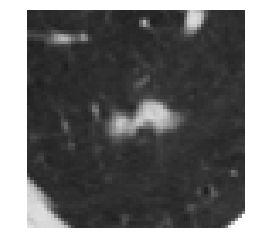

id = c0c5a155e6e59588783c2964975e7e1e  label = 0.0
id = c25876fb40d6f8dafd1ecb243193dd3f  label = 1.0
  activation = 4.11089
  activation = 3.68732


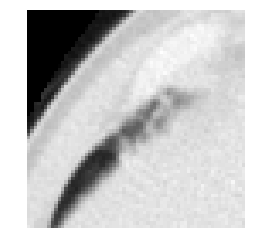

  activation = 6.16297


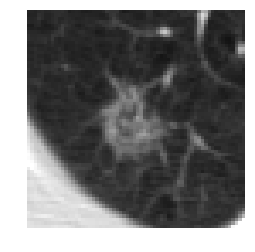

id = c2ef34cc347bc224b5a123426009d027  label = 0.0
  activation = 3.92263


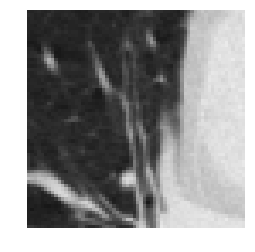

id = c3a9046fbe2b0f0a4e43a669c321e472  label = 0.0
id = c46c3962c10e287f1c1e3af0d309a128  label = 0.0
  activation = 4.0907


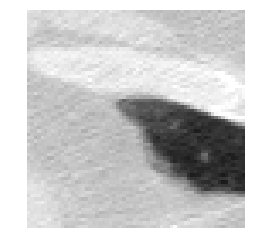

  activation = 4.69807


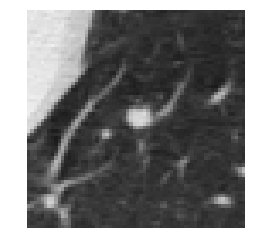

  activation = 3.85167


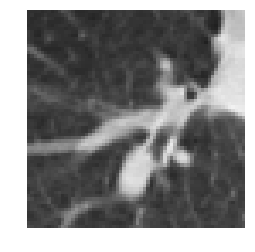

  activation = 5.20601


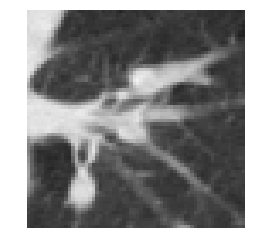

id = c71d0db2086b7e2024ca9c11bd2ca504  label = 1.0
  activation = 3.97903


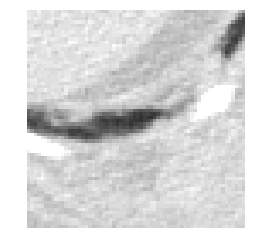

  activation = 4.11478


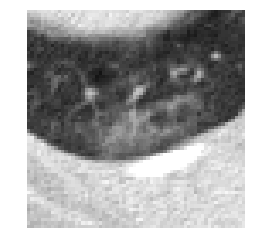

  activation = 5.56533


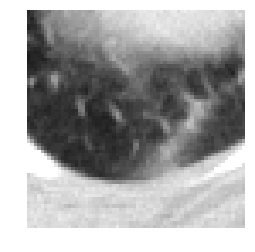

  activation = 3.75766


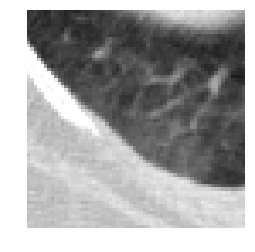

  activation = 3.67205


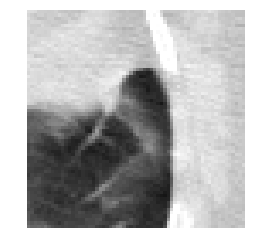

  activation = 4.81472


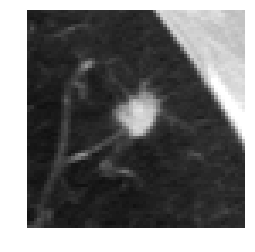

id = c7bdb83b7ca6269fac16ab7cff930a2e  label = 0.0
  activation = 3.18133


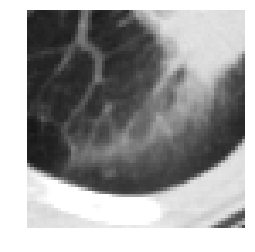

  activation = 6.71395


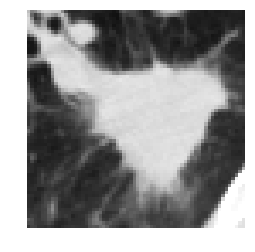

  activation = 3.69676


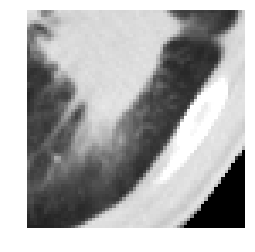

  activation = 4.67125


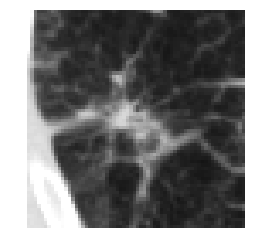

  activation = 4.46164


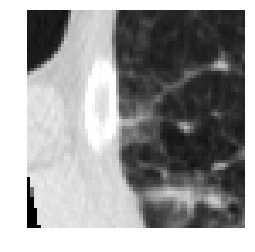

  activation = 4.62192


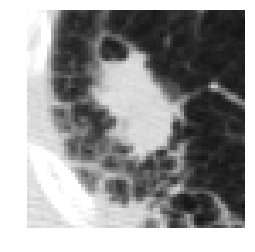

id = c87a713d17522698958de55c97654beb  label = 1.0
id = c95f2aa23e6d6702f5b16a3b35f89cf0  label = 0.0
  activation = 4.75351


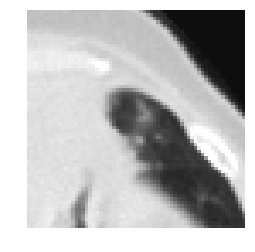

  activation = 3.98759


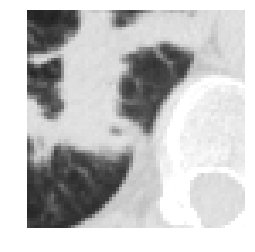

  activation = 3.90086


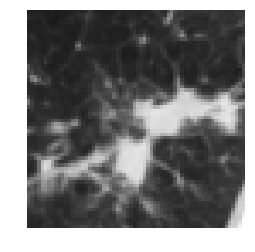

id = cbb9bbd994c235b56fb77429291edf99  label = 0.0
id = cc1b7e34d9eba737c9fb91316463e8f7  label = 0.0
id = cc4805e3ebe8621bc94a621b1714fc84  label = 0.0
id = cd68d1a14cc504e3f7434d5cc324744d  label = 0.0
id = cd6be62834c72756738935f904ec9c2c  label = 0.0
id = cdb53f3be6d8cce07fa41c833488d8a5  label = 0.0
  activation = 4.95431


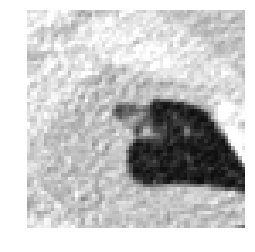

  activation = 3.47598


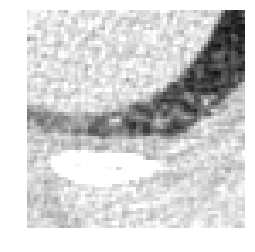

  activation = 4.11094


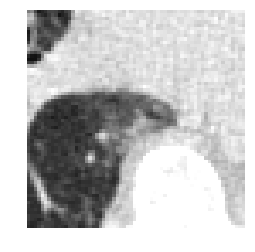

id = d03127f497cae40bcbd9996b4d1f5b90  label = 0.0
id = d032116d73789ff9c805f493357b4037  label = 1.0
id = d1131708024b32032ade1ef48d115915  label = 0.0
id = d1a20ef45bb03f93a407b492066f6d88  label = 0.0
id = d2ec8f0fc56a9168cda0c707e49974ab  label = 0.0
  activation = 4.90007


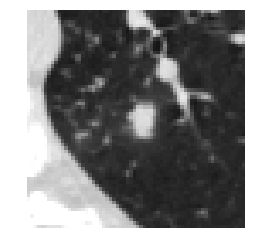

  activation = 4.97227


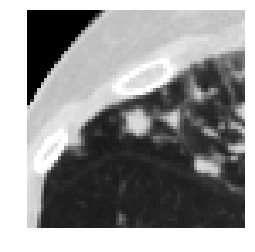

  activation = 4.53437


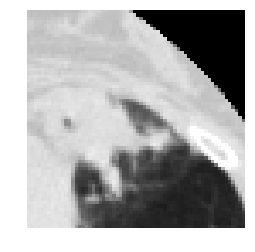

  activation = 4.59029


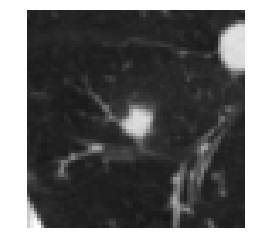

id = d3a8fb1da8f7a0dcbd5a8d65f3647757  label = 0.0
  activation = 6.26247


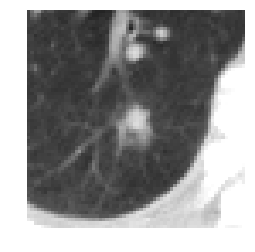

  activation = 4.89652


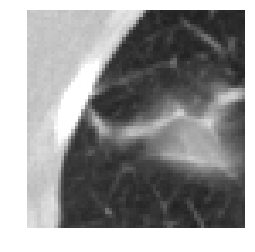

  activation = 5.23083


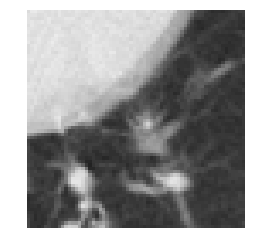

  activation = 4.59426


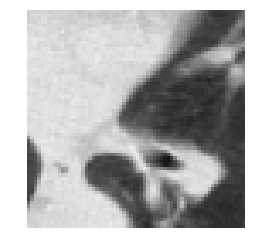

  activation = 6.23078


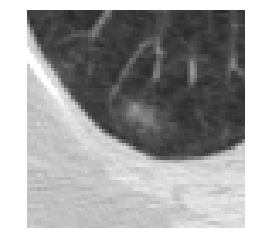

  activation = 3.89203


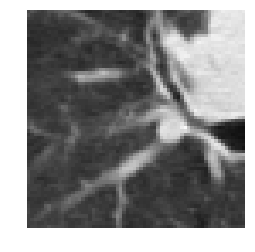

  activation = 3.21483


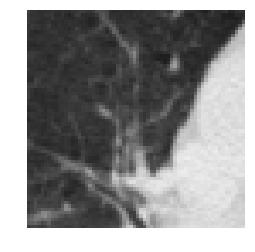

id = d42c998d037fb3003faba541e2cf649a  label = 0.0
id = d4a075768abe7fe43ad1caac92515256  label = 1.0
  activation = 4.55689


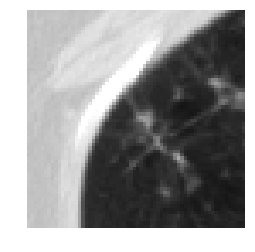

id = d5a0333be8795805fc39509f817780ee  label = 0.0
  activation = 3.64451
id = d654966fd2498de023552b830c07a659  label = 0.0
id = d753676c2c6c8ac6f97bd61ecab7554a  label = 0.0
id = d81852bffda09dc8033a45332397c495  label = 1.0
  activation = 4.41302


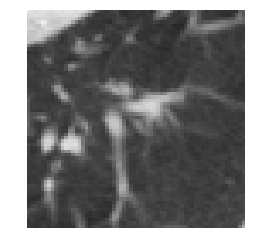

  activation = 5.22854


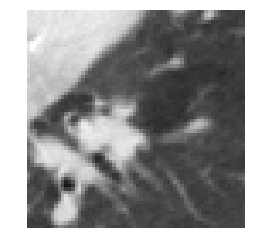

  activation = 5.12949


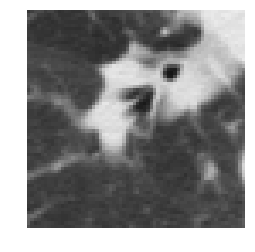

  activation = 4.00558


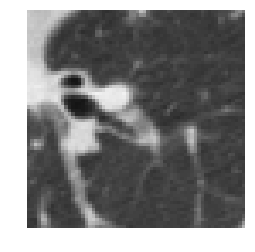

id = dbd9c8025907511e965e7abad955547d  label = 0.0
  activation = 4.05891


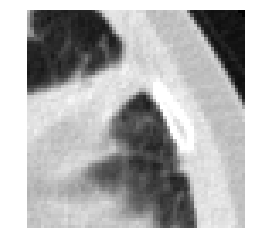

  activation = 4.67453


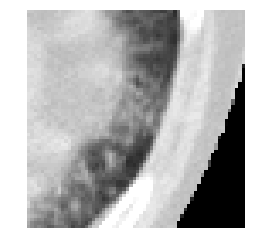

  activation = 4.55537


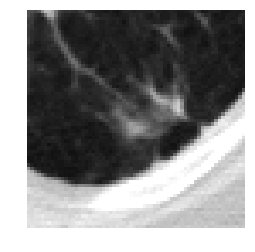

id = e0aa61b44c33e6a75940a8541c6894c9  label = 0.0
  activation = 4.77613


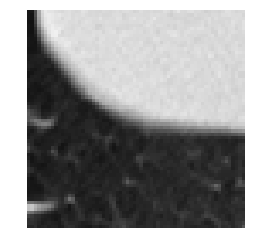

id = e314fd13809db0132443b924401d828b  label = 1.0
id = e33c25d0dbca5e54385f2100ce523467  label = 0.0
id = e3bc0a970a4af5d52826e06742f90e5b  label = 0.0
id = e42065c1145ccf734312cb9edbe5234b  label = 0.0
  activation = 4.23861


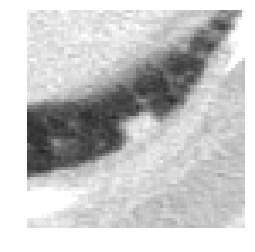

  activation = 4.5108


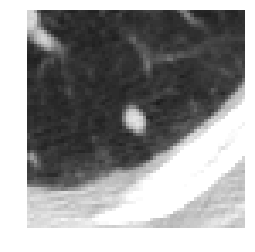

id = e60d99ea9648e1ce859eb0b386365e26  label = 0.0
  activation = 5.35099


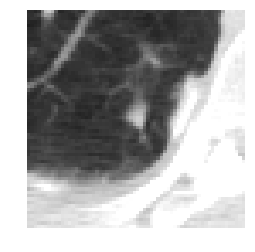

id = e6160ed0ff2eb214abd4df9a3c336c1d  label = 1.0
  activation = 3.53592


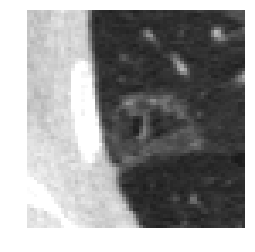

  activation = 6.23129


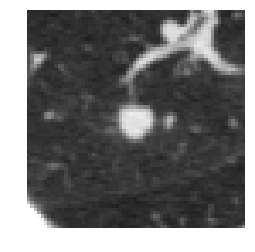

id = e6d8ae8c3b0817df994a1ce3b37a7efb  label = 1.0
id = e9a27e2645e1fad9434ce765f678585f  label = 0.0
id = ea01deecde93cd9503a049d71d46e6d5  label = 1.0
id = ea3a771ef05e288409e0250ea893cf87  label = 0.0
  activation = 5.05036


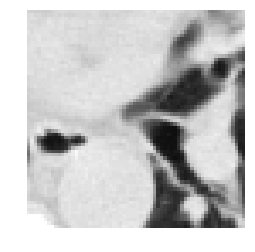

id = eaeebb7a63edc8a329a7c5fbc583a507  label = 0.0
  activation = 4.81187


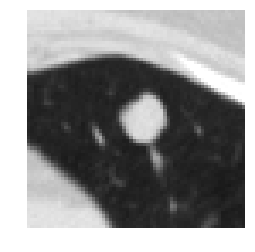

id = eb9db3f740f8e153e85f83c57bc4e522  label = 0.0
  activation = 3.01668


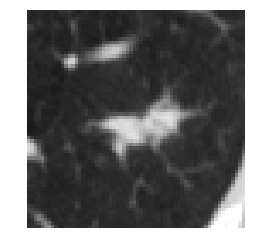

id = ebcdfabecf4b46b1e55e4a4c75a0afb0  label = 1.0
  activation = 3.5636


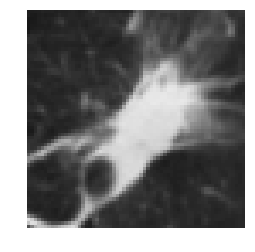

  activation = 6.34724


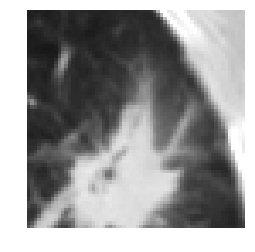

id = efcb6def7a2080243052b6046186ab24  label = 1.0
  activation = 3.97521


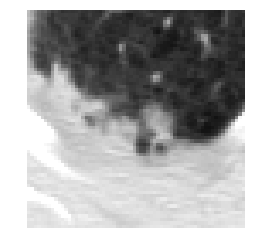

id = f0310ffc724faf9f7aef2c418127ee68  label = 0.0
id = f4d23e0272a2ce5bfc7f07033d4f2e7d  label = 1.0
  activation = 4.81291


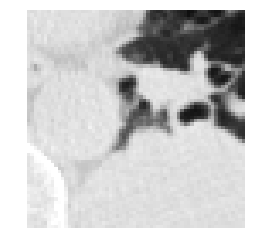

  activation = 3.50371


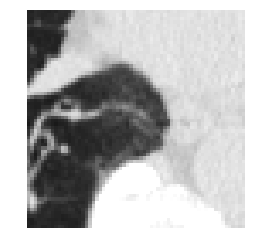

id = f5ff7734997820b45dafa75dff60ece8  label = 0.0
id = f7c387290d7e3074501eac167c849000  label = 1.0
  activation = 4.94397


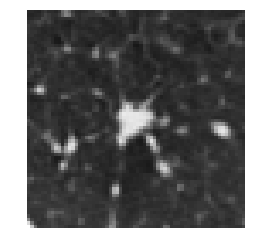

  activation = 5.82629


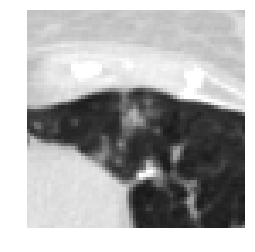

  activation = 3.50227


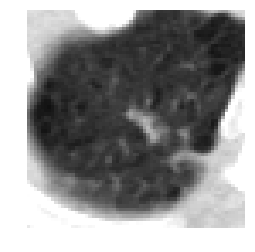

id = f89e3d0867e27be8e19d7ed50e1eb7e8  label = 0.0
  activation = 4.27094


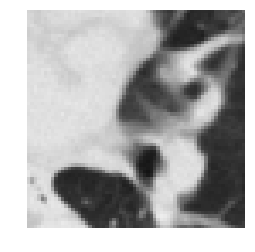

id = fad57a1078ddbc685e517bd8f24aa8ac  label = 1.0
id = fb55849cee6473974612c17f094a38cd  label = 0.0
  activation = 4.40089


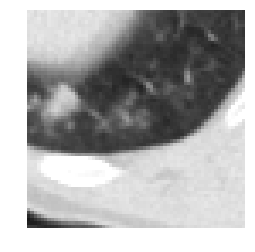

  activation = 5.72469


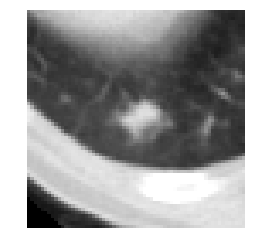

  activation = 3.96451


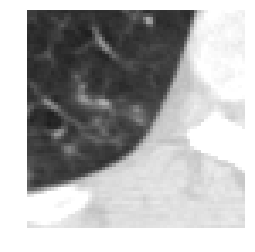

  activation = 4.21646


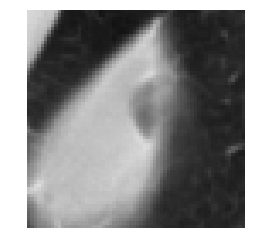

  activation = 4.29103


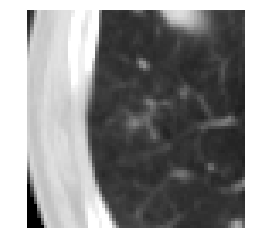

  activation = 4.55691


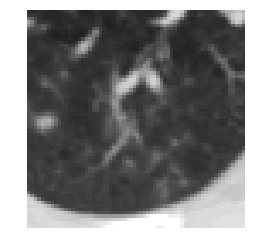

  activation = 5.03503


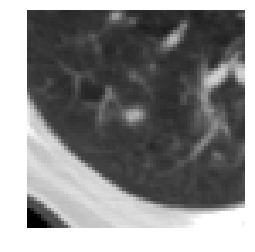

  activation = 5.43316


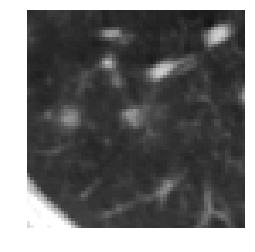

  activation = 6.37932


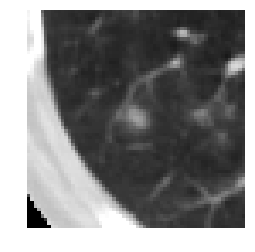

  activation = 5.31819


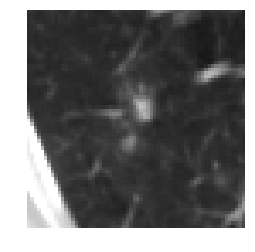

  activation = 3.83947


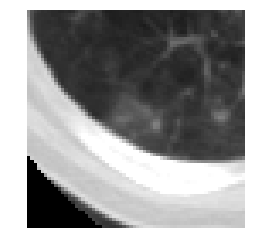

  activation = 3.65022


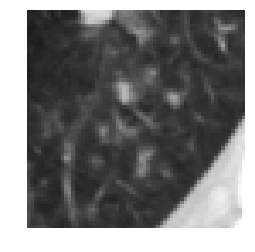

  activation = 5.42864


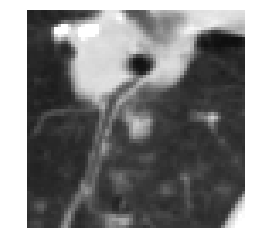

  activation = 4.05499


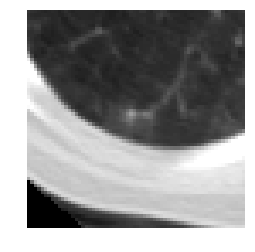

  activation = 4.33708


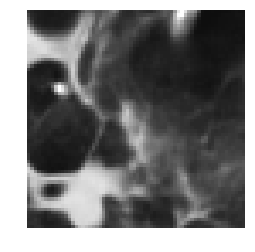

  activation = 4.52323


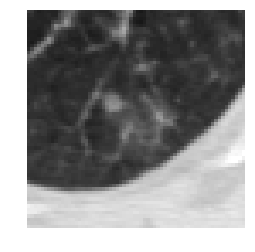

  activation = 4.77761


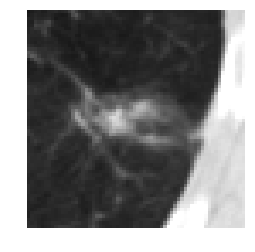

  activation = 5.21767


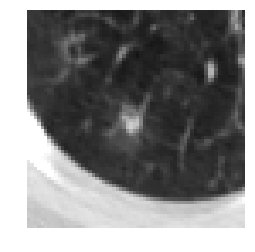

  activation = 5.63801


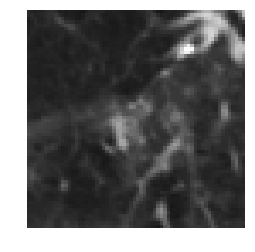

  activation = 5.75039


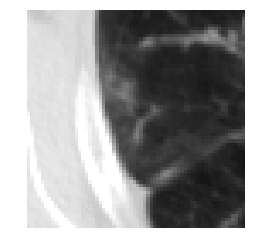

  activation = 5.38362


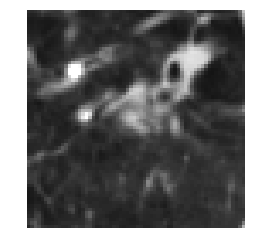

id = fb5874408966d7c6bebd3d84a5599e20  label = 0.0
  activation = 5.90677


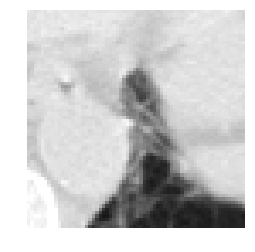

id = fcfab3eddbdf0421c39f71d651cc5c56  label = 0.0
  activation = 5.71905


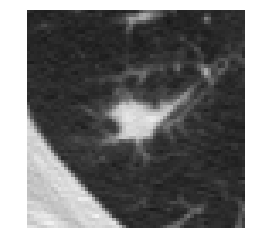

id = fdcd385b0d2d12341661e1abe845be0b  label = 0.0
id = ff8599dd7c1139be3bad5a0351ab749a  label = 0.0
num_cancer = 57
num_cancer_without_detection = 11
num_noncancer = 141
num_noncancer_with_detection = 75
num_detections = 321


In [6]:
vsize = np.asarray([64,64,64])

num_cancer = 0
num_cancer_without_detection = 0
num_noncancer = 0
num_noncancer_with_detection = 0
num_detections = 0

for n, pid in enumerate(patient_ids):
    print("id = " + pid + "  label = " + str(df["cancer"][n]))

    with open(localizer_output_dir + 'boxes/' + pid + '.pkl', 'rb') as fh:
        label_boxes, label_sizes, label_activities_sum, label_activities_max = pickle.load( fh )

    has_detection = False
    for idx in range(len(label_boxes)):
        box = label_boxes[idx]
        if box is None:
            continue
        if label_activities_sum[idx] < min_activity:
            continue

        print("  activation = " + str(label_activities_max[idx]))
        has_detection = True
        num_detections += 1
        
        image = data.ndsb17_get_image(pid)

        center = 2*np.asarray([(box[0].start+box[0].stop)//2, (box[1].start+box[1].stop)//2, (box[2].start+box[2].stop)//2 ])
        pos = center - vsize//2
        volume = image[pos[0]:pos[0]+vsize[0], pos[1]:pos[1]+vsize[1], pos[2]:pos[2]+vsize[2] ]
        if volume.shape != (64,64,64):
            continue # TODO report something
        
        plt.imshow(volume.copy()[32], vmin=-1100, vmax=200, cmap='gray')
        plt.axis('off')
        plt.show()

    if df["cancer"][n] == 1:
        num_cancer += 1
        if not has_detection:
            num_cancer_without_detection += 1
    
    
    if df["cancer"][n] == 0:
        num_noncancer += 1
        if has_detection:
            num_noncancer_with_detection += 1
            
print("num_cancer = " + str(num_cancer))
print("num_cancer_without_detection = " + str(num_cancer_without_detection))
print("num_noncancer = " + str(num_noncancer))
print("num_noncancer_with_detection = " + str(num_noncancer_with_detection))
print("num_detections = " + str(num_detections))

